# **Binary Classification - Bee or Not Bee**

We are going to use a feedforward network to classify images to identify if an image has a bee or doesn't have a bee in it.

We are going to use some predefined classes to create our network.

In [ ]:
archive = "DL_A1.zip"
url = "https://cloud.tu-ilmenau.de/s/bEE9tfyP4T84QF6/download"
!wget -nv -t 0 --show-progress -O $archive $url
!unzip -j $archive
!pip install .

DL_A1.zip               [     <=>            ]   6.37M  7.68MB/s    in 0.8s    
2023-11-13 21:06:08 URL:https://cloud.tu-ilmenau.de/s/bEE9tfyP4T84QF6/download [6680610] -> "DL_A1.zip" [1]
Archive:  DL_A1.zip
replace ToBeeOrNotToBee_small_256px.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: Processing /content
  Preparing metadata (setup.py) ... done
  Created wheel for GA1-NeuralNetworks: filename=GA1_NeuralNetworks-1.0-py3-none-any.whl size=1141 sha256=36350e7342ef5613bb7c2eda7954e4e5b2badca80a67c5cf30f652086225fcfa
  Stored in directory: /tmp/pip-ephem-wheel-cache-jcs6qyql/wheels/e8/d3/96/0e8c7135806cbda4db28d12fc8d710e5e4f66ced1411163e67
Successfully built GA1-NeuralNetworks
  Attempting uninstall: GA1-NeuralNetworks
    Found existing installation: GA1-NeuralNetworks 1.0
    Uninstalling GA1-NeuralNetworks-1.0:
      Successfully uninstalled GA1-NeuralNetworks-1.0


In [ ]:
import layers
import models
import losses
import metrics
import optimizers
import utils

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#1 - Load and Prepare Data

In [ ]:
dataset_dir = utils.extract_dataset("ToBeeOrNotToBee_small_256px")

In [ ]:
X_train, Y_train = utils.load_images(dataset_dir.joinpath('train'))
X_val, Y_val= utils.load_images(dataset_dir.joinpath('val'))
X_test, Y_test = utils.load_images(dataset_dir.joinpath('test'))

ToBeeOrNotToBee_small_256px/train -> Found 289 images for 2 classes
ToBeeOrNotToBee_small_256px/val -> Found 90 images for 2 classes
ToBeeOrNotToBee_small_256px/test -> Found 98 images for 2 classes


In [ ]:
print(np.unique(Y_train))

['Bee' 'NoBee']


In [ ]:
# encode labels
# define label mapping
label2index = {"NoBee":0, "Bee":1}
index2label = {index: label for label, index in label2index.items()}
# replace label "NoBee" with int(0) and "Bee" with int(1)
Y_train = np.array([label2index[label] for label in Y_train])
Y_val = np.array([label2index[label] for label in Y_val])
Y_test = np.array([label2index[label] for label in Y_test])

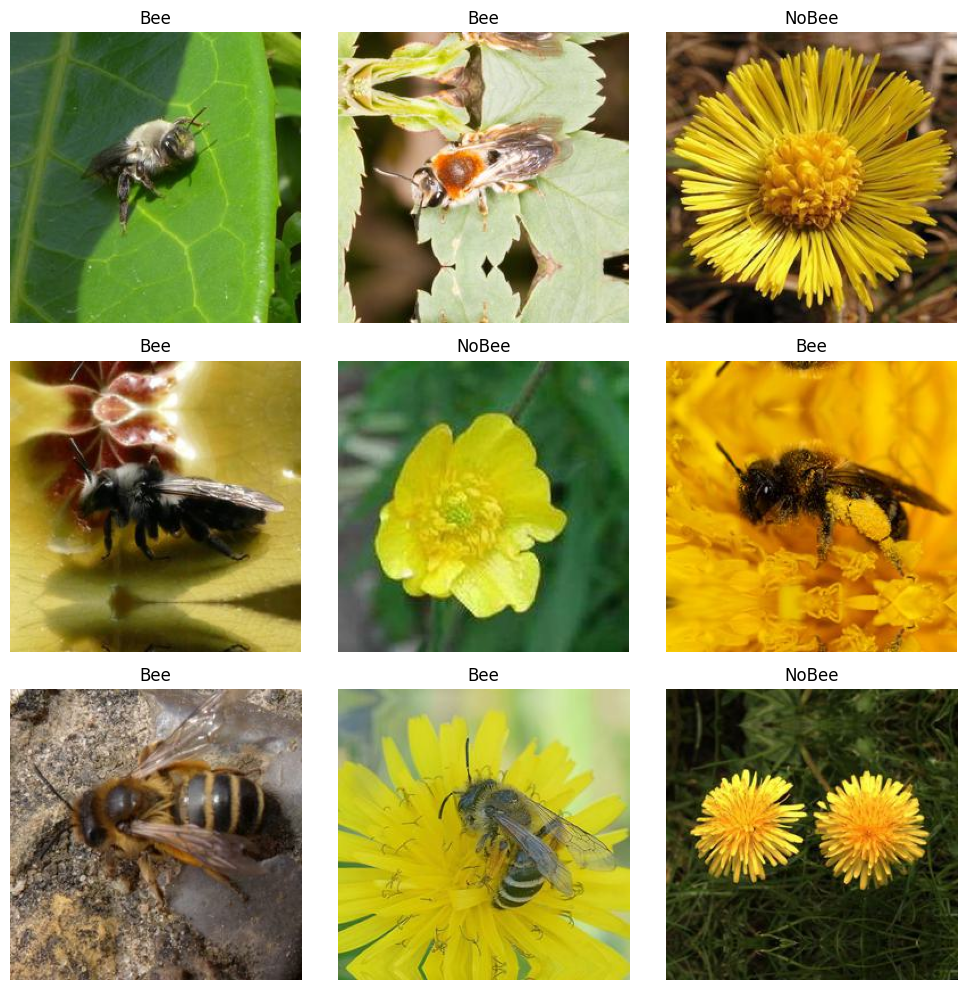

In [ ]:
utils.show_images(X_train, Y_train, index2label)

In [ ]:
print(X_train.shape)

(289, 256, 256, 3)


In [ ]:
# flatten images and check the shapes
X_train_for_opt = utils.flatten_images(X_train)
X_val_for_opt = utils.flatten_images(X_val)
X_test_for_opt = utils.flatten_images(X_test)

for arr in [X_train_for_opt, X_val_for_opt, X_test_for_opt]:
  print(arr.shape)

(289, 196608)
(90, 196608)
(98, 196608)


In [ ]:
# normalize images
X_train_for_opt = X_train_for_opt/255
X_val_for_opt = X_val_for_opt/255
X_test_for_opt = X_test_for_opt/255

#2 - Train a Two-layer Network

In [ ]:
input_size = X_train_for_opt.shape[1]
hidden_size = 16

L1 = layers.Dense(input_size, hidden_size)

Number of parameters per layer are the total number of trainable parameters in our layer. Since we have 16 neurons and 196608 inputs in the first layer, there will be 16*196608 different weights and 16 different biases. The number of parameters in layer 1 is 3145744.

In [ ]:
print(f"shape of W = {L1.W.shape}")
print(f"size of W = W.shape[0] * W.shape[1] = {L1.W.size}")
print(f"shape of b = {L1.b.shape}")
print(f"size of b = b.shape[0] * b.shape[1] = {L1.b.size}")
print(f"number_of_parameters = size of W + size of b = {L1.number_of_parameters}")

shape of W = (16, 196608)
size of W = W.shape[0] * W.shape[1] = 3145728
shape of b = (16, 1)
size of b = b.shape[0] * b.shape[1] = 16
number_of_parameters = size of W + size of b = 3145744


In [ ]:
L2 = layers.Dense(hidden_size, 1)
print(f"shape of W = {L2.W.shape} shape of b = {L2.b.shape}")
print(f"number_of_parameters = size of W + size of b = {L2.number_of_parameters}")
print(f"Total number of parameters in the network = {L1.number_of_parameters + L2.number_of_parameters}")

shape of W = (1, 16) shape of b = (1, 1)
number_of_parameters = size of W + size of b = 17
Total number of parameters in the network = 3145761


Now the number of parameters in layer 2 is 17. Hence, the total number of parameters of our network is 3145761.

In [ ]:
L1_act = layers.Sigmoid()
L2_act = layers.Sigmoid()

TwoLayerNet = models.NeuralNet([L1, L1_act, L2, L2_act])

Initialized Neural Network with 3145761 parameters:

   {layer}: {# parameters}
     Dense: 3145744
   Sigmoid: 0
     Dense: 17
   Sigmoid: 0


Now we need to compile our network for which we will need  a loss function, an optimizer, and an evaluation metric.

Since this is a binary classification problem, we can use the binary cross entropy loss function. We will use a gradient descent optimizer and our evaluation metric is a binary accuracy function. We are going to assume a learning rate of 1e-1.

In [ ]:
learning_rate = 1e-1
gd_optimizer = optimizers.GradientDescent(learning_rate)

TwoLayerNet.compile(losses.binary_cross_entropy_loss, gd_optimizer, metrics.binary_accuracy)

Let's train the network for 50 epochs.

In [ ]:
epochs = 50
history = TwoLayerNet.fit(X_train_for_opt.T, Y_train, X_val_for_opt.T, Y_val, epochs)

Epoch: 0 - loss: 0.717; validation_loss: 1.266; accuracy: 0.495; val_accuracy: 0.189
Epoch: 1 - loss: 0.873; validation_loss: 1.136; accuracy: 0.502; val_accuracy: 0.189
Epoch: 2 - loss: 0.814; validation_loss: 1.026; accuracy: 0.502; val_accuracy: 0.189
Epoch: 3 - loss: 0.771; validation_loss: 0.942; accuracy: 0.502; val_accuracy: 0.189
Epoch: 4 - loss: 0.740; validation_loss: 0.864; accuracy: 0.502; val_accuracy: 0.189
Epoch: 5 - loss: 0.708; validation_loss: 0.782; accuracy: 0.502; val_accuracy: 0.189
Epoch: 6 - loss: 0.683; validation_loss: 0.780; accuracy: 0.502; val_accuracy: 0.189
Epoch: 7 - loss: 0.685; validation_loss: 0.743; accuracy: 0.502; val_accuracy: 0.189
Epoch: 8 - loss: 0.670; validation_loss: 0.686; accuracy: 0.502; val_accuracy: 0.678
Epoch: 9 - loss: 0.655; validation_loss: 0.660; accuracy: 0.761; val_accuracy: 0.811
Epoch: 10 - loss: 0.655; validation_loss: 0.718; accuracy: 0.896; val_accuracy: 0.344
Epoch: 11 - loss: 0.644; validation_loss: 0.696; accuracy: 0.623

Let us plot the history.

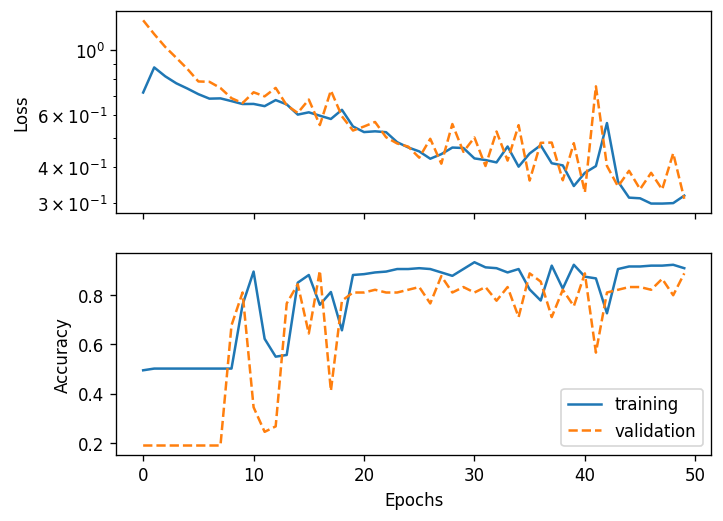

In [ ]:
utils.plot_history(history)

Lets do a forward pass using our test data on our network and use our evaluation metric on the output.

In [ ]:
Y_hat = TwoLayerNet.forward(X_test_for_opt.T)
accuracy = metrics.binary_accuracy(Y_test, Y_hat)
print(f"The accuracy of the Two Layer Network is {accuracy*100} %")

The accuracy of the Two Layer Network is 90.81632653061224 %


We used Gradient Descent optimizer here, which passes all the test samples at the same time to optimize and repeats passing all samples per epoch.

Our test accuracy is stabilizing around 91%. And the validation accuracy is lower at roughly 88%. At every epoch the accuracy is updated. There are some dips in the curve, which suggest maybe reaching a local minima, but overall the accuracy increased. Similary, the loss has also gradually reduced with a few spikes, but generally tending towards a decrease over the course of many epochs. The test loss is slowly stabilizing towards 0.310 with validation loss close the test loss.


#3 - Wider Network

Now we will train a new network which has 64 neurons in the first layer.

In [ ]:
wide_hidden_size = 64
wL1 = layers.Dense(input_size, wide_hidden_size)
wL2 = layers.Dense(wide_hidden_size, 1)
wL1_act = layers.Sigmoid()
wL2_act = layers.Sigmoid()

Since there are 64 neurons now, and the same inputs, the number of parameters in layer 1 will be the number of weights plus the number of biases, i.e., 64\*196608 + 64\*1 = 12582976. The number of parameters in layer 2 will be 64 + 1 = 65.

Therefore, the total number of parameters of the whole network will be 12583041.

In [ ]:
print(f"L1: shape of W = {wL1.W.shape} shape of b = {wL1.b.shape}")
print(f"L2: shape of W = {wL2.W.shape} shape of b = {wL2.b.shape}")
print(f"number_of_parameters = size of W + size of b = {wL2.number_of_parameters}")
print(f"Total number of parameters in the network = {wL1.number_of_parameters + wL2.number_of_parameters}")

L1: shape of W = (64, 196608) shape of b = (64, 1)
L2: shape of W = (1, 64) shape of b = (1, 1)
number_of_parameters = size of W + size of b = 65
Total number of parameters in the network = 12583041


In [ ]:
WiderNet = models.NeuralNet([wL1, wL1_act, wL2, wL2_act])
wgd_optimizer = optimizers.GradientDescent(learning_rate)
WiderNet.compile(losses.binary_cross_entropy_loss, wgd_optimizer, metrics.binary_accuracy)

Initialized Neural Network with 12583041 parameters:

   {layer}: {# parameters}
     Dense: 12582976
   Sigmoid: 0
     Dense: 65
   Sigmoid: 0


In [ ]:
whistory = WiderNet.fit(X_train_for_opt.T, Y_train, X_val_for_opt.T, Y_val, epochs)

Epoch: 0 - loss: 0.931; validation_loss: 3.155; accuracy: 0.498; val_accuracy: 0.189
Epoch: 1 - loss: 1.946; validation_loss: 2.165; accuracy: 0.502; val_accuracy: 0.189
Epoch: 2 - loss: 1.358; validation_loss: 1.376; accuracy: 0.502; val_accuracy: 0.189
Epoch: 3 - loss: 0.928; validation_loss: 0.928; accuracy: 0.502; val_accuracy: 0.189
Epoch: 4 - loss: 0.738; validation_loss: 0.766; accuracy: 0.502; val_accuracy: 0.189
Epoch: 5 - loss: 0.699; validation_loss: 0.717; accuracy: 0.502; val_accuracy: 0.189
Epoch: 6 - loss: 0.694; validation_loss: 0.703; accuracy: 0.502; val_accuracy: 0.189
Epoch: 7 - loss: 0.693; validation_loss: 0.698; accuracy: 0.502; val_accuracy: 0.189
Epoch: 8 - loss: 0.693; validation_loss: 0.696; accuracy: 0.502; val_accuracy: 0.189
Epoch: 9 - loss: 0.693; validation_loss: 0.696; accuracy: 0.502; val_accuracy: 0.189
Epoch: 10 - loss: 0.693; validation_loss: 0.695; accuracy: 0.502; val_accuracy: 0.189
Epoch: 11 - loss: 0.693; validation_loss: 0.695; accuracy: 0.502

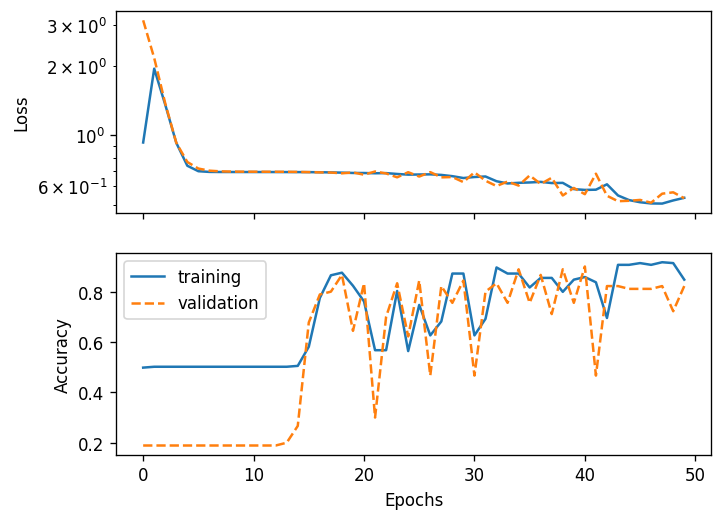

In [ ]:
utils.plot_history(whistory)

Lets do a forward pass using our test data on this trained network and use our evaluation metric on the output.

In [ ]:
Y_hat = WiderNet.forward(X_test_for_opt.T)
accuracy = metrics.binary_accuracy(Y_test, Y_hat)
print(f"The accuracy of the Wider Network is {accuracy*100} %")

The accuracy of the Wider Network is 89.79591836734694 %


Once again, we used Gradient Descent optimizer to optimize our wider network for 50 epochs.

Our test accuracy is around 89%. The loss increases initially for a short period, but then reduces quickly. The accuracy is fluctuating but reducing steadily. There are more dips and spikes compared to the previous network we trained.

Now let us change the learning rate of the wider network and optimize it again.


In [ ]:
learning_rate_2 = 1e-2
wgd_optimizer_2 = optimizers.GradientDescent(learning_rate_2)
WiderNet.compile(losses.binary_cross_entropy_loss, wgd_optimizer_2, metrics.binary_accuracy)

In [ ]:
whistory2 = WiderNet.fit(X_train_for_opt.T, Y_train, X_val_for_opt.T, Y_val, epochs)

Epoch: 0 - loss: 0.546; validation_loss: 0.525; accuracy: 0.907; val_accuracy: 0.811
Epoch: 1 - loss: 0.515; validation_loss: 0.524; accuracy: 0.913; val_accuracy: 0.822
Epoch: 2 - loss: 0.500; validation_loss: 0.523; accuracy: 0.920; val_accuracy: 0.822
Epoch: 3 - loss: 0.493; validation_loss: 0.519; accuracy: 0.927; val_accuracy: 0.833
Epoch: 4 - loss: 0.489; validation_loss: 0.514; accuracy: 0.927; val_accuracy: 0.833
Epoch: 5 - loss: 0.484; validation_loss: 0.509; accuracy: 0.927; val_accuracy: 0.844
Epoch: 6 - loss: 0.481; validation_loss: 0.504; accuracy: 0.927; val_accuracy: 0.844
Epoch: 7 - loss: 0.477; validation_loss: 0.500; accuracy: 0.927; val_accuracy: 0.844
Epoch: 8 - loss: 0.474; validation_loss: 0.497; accuracy: 0.927; val_accuracy: 0.844
Epoch: 9 - loss: 0.471; validation_loss: 0.494; accuracy: 0.927; val_accuracy: 0.844
Epoch: 10 - loss: 0.469; validation_loss: 0.492; accuracy: 0.927; val_accuracy: 0.844
Epoch: 11 - loss: 0.467; validation_loss: 0.490; accuracy: 0.927

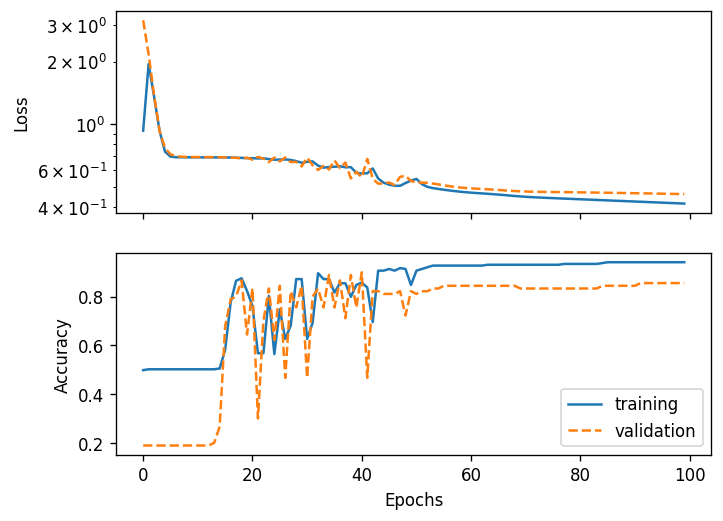

In [ ]:
utils.plot_history(whistory2)

In [ ]:
Y_hat_2 = WiderNet.forward(X_test_for_opt.T)
accuracy2 = metrics.binary_accuracy(Y_test, Y_hat)
print(f"The accuracy of the Wider Network with 1e-2 learning rate is {accuracy2*100} %")

The accuracy of the Wider Network with 1e-2 learning rate is 89.79591836734694 %


The change in learning rate changed the accuracy and loss graphs. Slower learning rates caused fluctuations early on and then reduces the loss as expected. Smaller step size also caused fluctuations early on in accuracy but we get a stable value in later epochs. Compared to the higher learning rate, we got a good convergence with lower learning rate.

#4 - Deeper Network

Let us train a new deeper network with four hidden layers each with 16 neurons.

In [ ]:
deep_hidden_size = 16
dL1 = layers.Dense(input_size, deep_hidden_size)
dL2 = layers.Dense(deep_hidden_size, deep_hidden_size)
dL3 = layers.Dense(deep_hidden_size, deep_hidden_size)
dL4 = layers.Dense(deep_hidden_size, deep_hidden_size)
dL5 = layers.Dense(deep_hidden_size, 1)
dL1_act = layers.Sigmoid()
dL2_act = layers.Sigmoid()
dL3_act = layers.Sigmoid()
dL4_act = layers.Sigmoid()
dL5_act = layers.Sigmoid()

In [ ]:
DeeperNet = models.NeuralNet([dL1, dL1_act, dL2, dL2_act, dL3, dL3_act, dL4, dL4_act, dL5, dL5_act])

Initialized Neural Network with 3146577 parameters:

   {layer}: {# parameters}
     Dense: 3145744
   Sigmoid: 0
     Dense: 272
   Sigmoid: 0
     Dense: 272
   Sigmoid: 0
     Dense: 272
   Sigmoid: 0
     Dense: 17
   Sigmoid: 0


The number of parameters here are calculated in the same way as before. This time we have more layers with more neurons.

Total number of parameters = 16\*196608 + 16 + 16\*16 + 16 + 16\*16 + 16 + 16\*16 + 16 + 16\*1 + 1 = 3146577

In [ ]:
dgd_optimizer = optimizers.GradientDescent(learning_rate_2)
DeeperNet.compile(losses.binary_cross_entropy_loss, dgd_optimizer, metrics.binary_accuracy)

In [ ]:
dhistory = DeeperNet.fit(X_train_for_opt.T, Y_train, X_val_for_opt.T, Y_val, epochs)

Epoch: 0 - loss: 0.707; validation_loss: 0.809; accuracy: 0.502; val_accuracy: 0.189
Epoch: 1 - loss: 0.706; validation_loss: 0.807; accuracy: 0.502; val_accuracy: 0.189
Epoch: 2 - loss: 0.706; validation_loss: 0.805; accuracy: 0.502; val_accuracy: 0.189
Epoch: 3 - loss: 0.705; validation_loss: 0.803; accuracy: 0.502; val_accuracy: 0.189
Epoch: 4 - loss: 0.705; validation_loss: 0.801; accuracy: 0.502; val_accuracy: 0.189
Epoch: 5 - loss: 0.705; validation_loss: 0.799; accuracy: 0.502; val_accuracy: 0.189
Epoch: 6 - loss: 0.704; validation_loss: 0.797; accuracy: 0.502; val_accuracy: 0.189
Epoch: 7 - loss: 0.704; validation_loss: 0.796; accuracy: 0.502; val_accuracy: 0.189
Epoch: 8 - loss: 0.704; validation_loss: 0.794; accuracy: 0.502; val_accuracy: 0.189
Epoch: 9 - loss: 0.703; validation_loss: 0.792; accuracy: 0.502; val_accuracy: 0.189
Epoch: 10 - loss: 0.703; validation_loss: 0.790; accuracy: 0.502; val_accuracy: 0.189
Epoch: 11 - loss: 0.703; validation_loss: 0.789; accuracy: 0.502

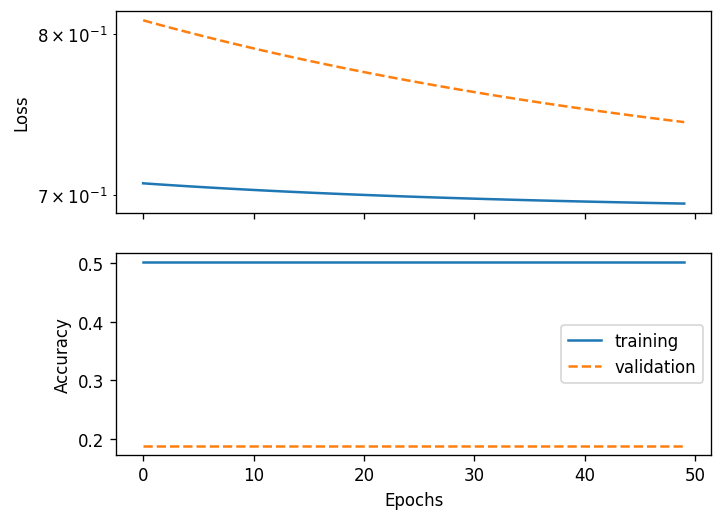

In [ ]:
utils.plot_history(dhistory)

In this Deeper Neural Network, the loss has a very minimal steady change across epochs. But there is no change at all in both the training and the validation accuracy.

This is due to a complex network with exactly the same number of neurons in each layer. There is no possibility of progress due to the inefficiency of the network structure. This kind of problem might require a wider shallower network with varied number of neurons, instead of this deep network.

#5 - SGD

We will implement a new optimizer called StochasticGradientDescent which implements Stochastic Gradient Descent with mini-batches.

In [ ]:
from sklearn.utils import shuffle
from sklearn.utils import gen_batches
from math import ceil

class StochasticGradientDescent:

  def __init__(self, learning_rate, batch_size):
    self.model = None
    self.learning_rate = learning_rate
    self.batch_size = batch_size

  def step(self, X, Y, epoch):
    """Perform one step of mini-batch stochastic gradient descent.

    Args:
        X (numpy.ndarray): input data of shape `(num_features, num_samples)`
        Y (numpy.ndarray): expected output of shape `(num_classes, num_samples)`
        epoch (int): current epoch

    Returns:
        float: loss
        numpy.ndarray: predicted output of shape `(num_classes, num_samples)`
    """
    mini_batches = list(gen_batches(X.shape[1], self.batch_size))
    for mini_batch in mini_batches:
      X_mini_batch = X[:, mini_batch]
      Y_mini_batch = Y[mini_batch]

      # forward
      Y_hat = self.model.forward(X_mini_batch)
      # compute loss
      loss, dY_hat = self.model.loss_function(Y_mini_batch, Y_hat)
      # backprop loss
      self.model.backward(dY_hat)
      # update layers
      self.model.update(self.learning_rate)

    return loss, Y_hat

We will test this on our Two Layer Network with batch size 64.

In [ ]:
TwoLayerNet2 = models.NeuralNet([L1, L1_act, L2, L2_act])

Initialized Neural Network with 3145761 parameters:

   {layer}: {# parameters}
     Dense: 3145744
   Sigmoid: 0
     Dense: 17
   Sigmoid: 0


In [ ]:
batch_size = 64
sgd_optimizer = StochasticGradientDescent(learning_rate, batch_size)

TwoLayerNet2.compile(losses.binary_cross_entropy_loss, sgd_optimizer, metrics.binary_accuracy)

In [ ]:
sgd_epochs = 50
sgd_history = TwoLayerNet2.fit(X_train_for_opt.T, Y_train, X_val_for_opt.T, Y_val, sgd_epochs)

Epoch: 0 - loss: 0.886; validation_loss: 0.591; accuracy: 0.000; val_accuracy: 0.900
Epoch: 1 - loss: 0.598; validation_loss: 0.523; accuracy: 0.000; val_accuracy: 0.811
Epoch: 2 - loss: 0.523; validation_loss: 0.493; accuracy: 0.000; val_accuracy: 0.811
Epoch: 3 - loss: 0.459; validation_loss: 0.450; accuracy: 0.000; val_accuracy: 0.811
Epoch: 4 - loss: 0.395; validation_loss: 0.444; accuracy: 0.000; val_accuracy: 0.811
Epoch: 5 - loss: 0.387; validation_loss: 0.398; accuracy: 0.000; val_accuracy: 0.856
Epoch: 6 - loss: 0.350; validation_loss: 0.403; accuracy: 0.000; val_accuracy: 0.856
Epoch: 7 - loss: 0.306; validation_loss: 0.400; accuracy: 0.000; val_accuracy: 0.856
Epoch: 8 - loss: 0.322; validation_loss: 0.393; accuracy: 0.000; val_accuracy: 0.856
Epoch: 9 - loss: 0.338; validation_loss: 0.371; accuracy: 0.000; val_accuracy: 0.889
Epoch: 10 - loss: 0.403; validation_loss: 0.382; accuracy: 0.000; val_accuracy: 0.844
Epoch: 11 - loss: 0.288; validation_loss: 0.387; accuracy: 0.000

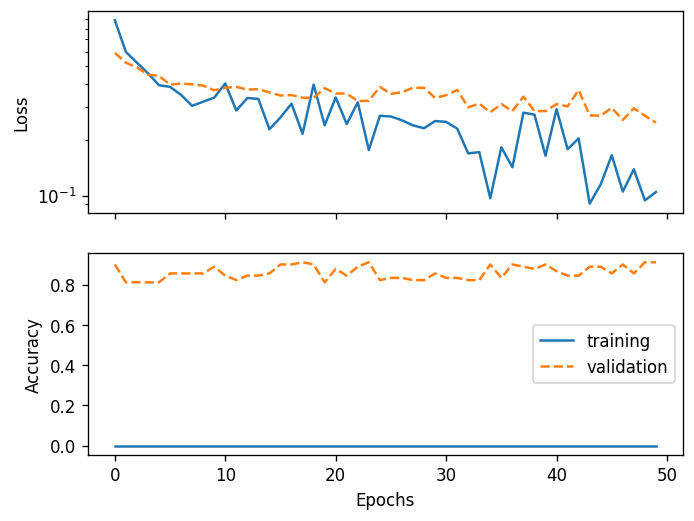

In [ ]:
utils.plot_history(sgd_history)

Stochastic Gradient Descent with mini-batches has a lot bigger fluctuations in the loss function but it finds a much better minima much quicker than the plain Stochastic Gradient with similar parameters (Section 2). The loss converges a lot sooner and also generalizes well over the validation dataset with a low validation loss value. The accuracy stays high all throughout the epochs. Training accuracy here is meaningless as the fit() is not designed to adapt to mini batch SGD.